# <font color=pink> Python for Finance
<font color=pink>
Starting with using yfinance library for obtaining the stock information. Due to recent updates, we cannot use yfinance directly. Thus, the work-around for it is pdr_override()

We use a start date and end date for the data required. Then we obtain the stock information.

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

yf.pdr_override()

stock = input("Enter a stock ticker symbol: ")
print(stock)

startyear = 2019
startmonth = 1
startday = 1

start = dt.datetime(startyear, startmonth, startday)

now = dt.datetime.now()

df = pdr.get_data_yahoo(stock, start, now)
df

TQQQ
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,9.340000,9.420000,9.012500,9.260000,9.253369,108483200
2019-01-02,8.695000,9.557500,8.682500,9.392500,9.385775,135832800
2019-01-03,8.995000,9.102500,8.407500,8.482500,8.476426,165255200
2019-01-04,8.887500,9.690000,8.792500,9.567500,9.560649,136482000
2019-01-07,9.617500,10.037500,9.532500,9.872500,9.865431,106553200
...,...,...,...,...,...,...
2022-06-17,22.070000,23.280001,21.650000,22.670000,22.670000,220134700
2022-06-21,23.820000,24.980000,23.780001,24.379999,24.379999,159204100
2022-06-22,23.709999,25.450001,23.549999,24.290001,24.290001,194486800


<font color=pink>Then we calculate the moving average with a period of 50 records(50 days) and store it in the column Sma+value of moving average period.

In [11]:
ma=50 #moving average
smaString="Sma"+str(ma)
df[smaString]=df['Adj Close'].rolling(window=ma).mean()
dff = df[49:]
print(dff[smaString])

Date
2019-03-13    11.594541
2019-03-14    11.679181
2019-03-15    11.767867
2019-03-18    11.877239
2019-03-19    11.967724
                ...    
2022-06-17    35.322800
2022-06-21    34.729400
2022-06-22    34.178400
2022-06-23    33.721800
2022-06-24    33.330600
Name: Sma50, Length: 829, dtype: float64


#### <font color=pink> Adj Close vs SMA Plot
<font color=pink> Plotting with x-axis time period of 1 month and y axis markings as mentioned.

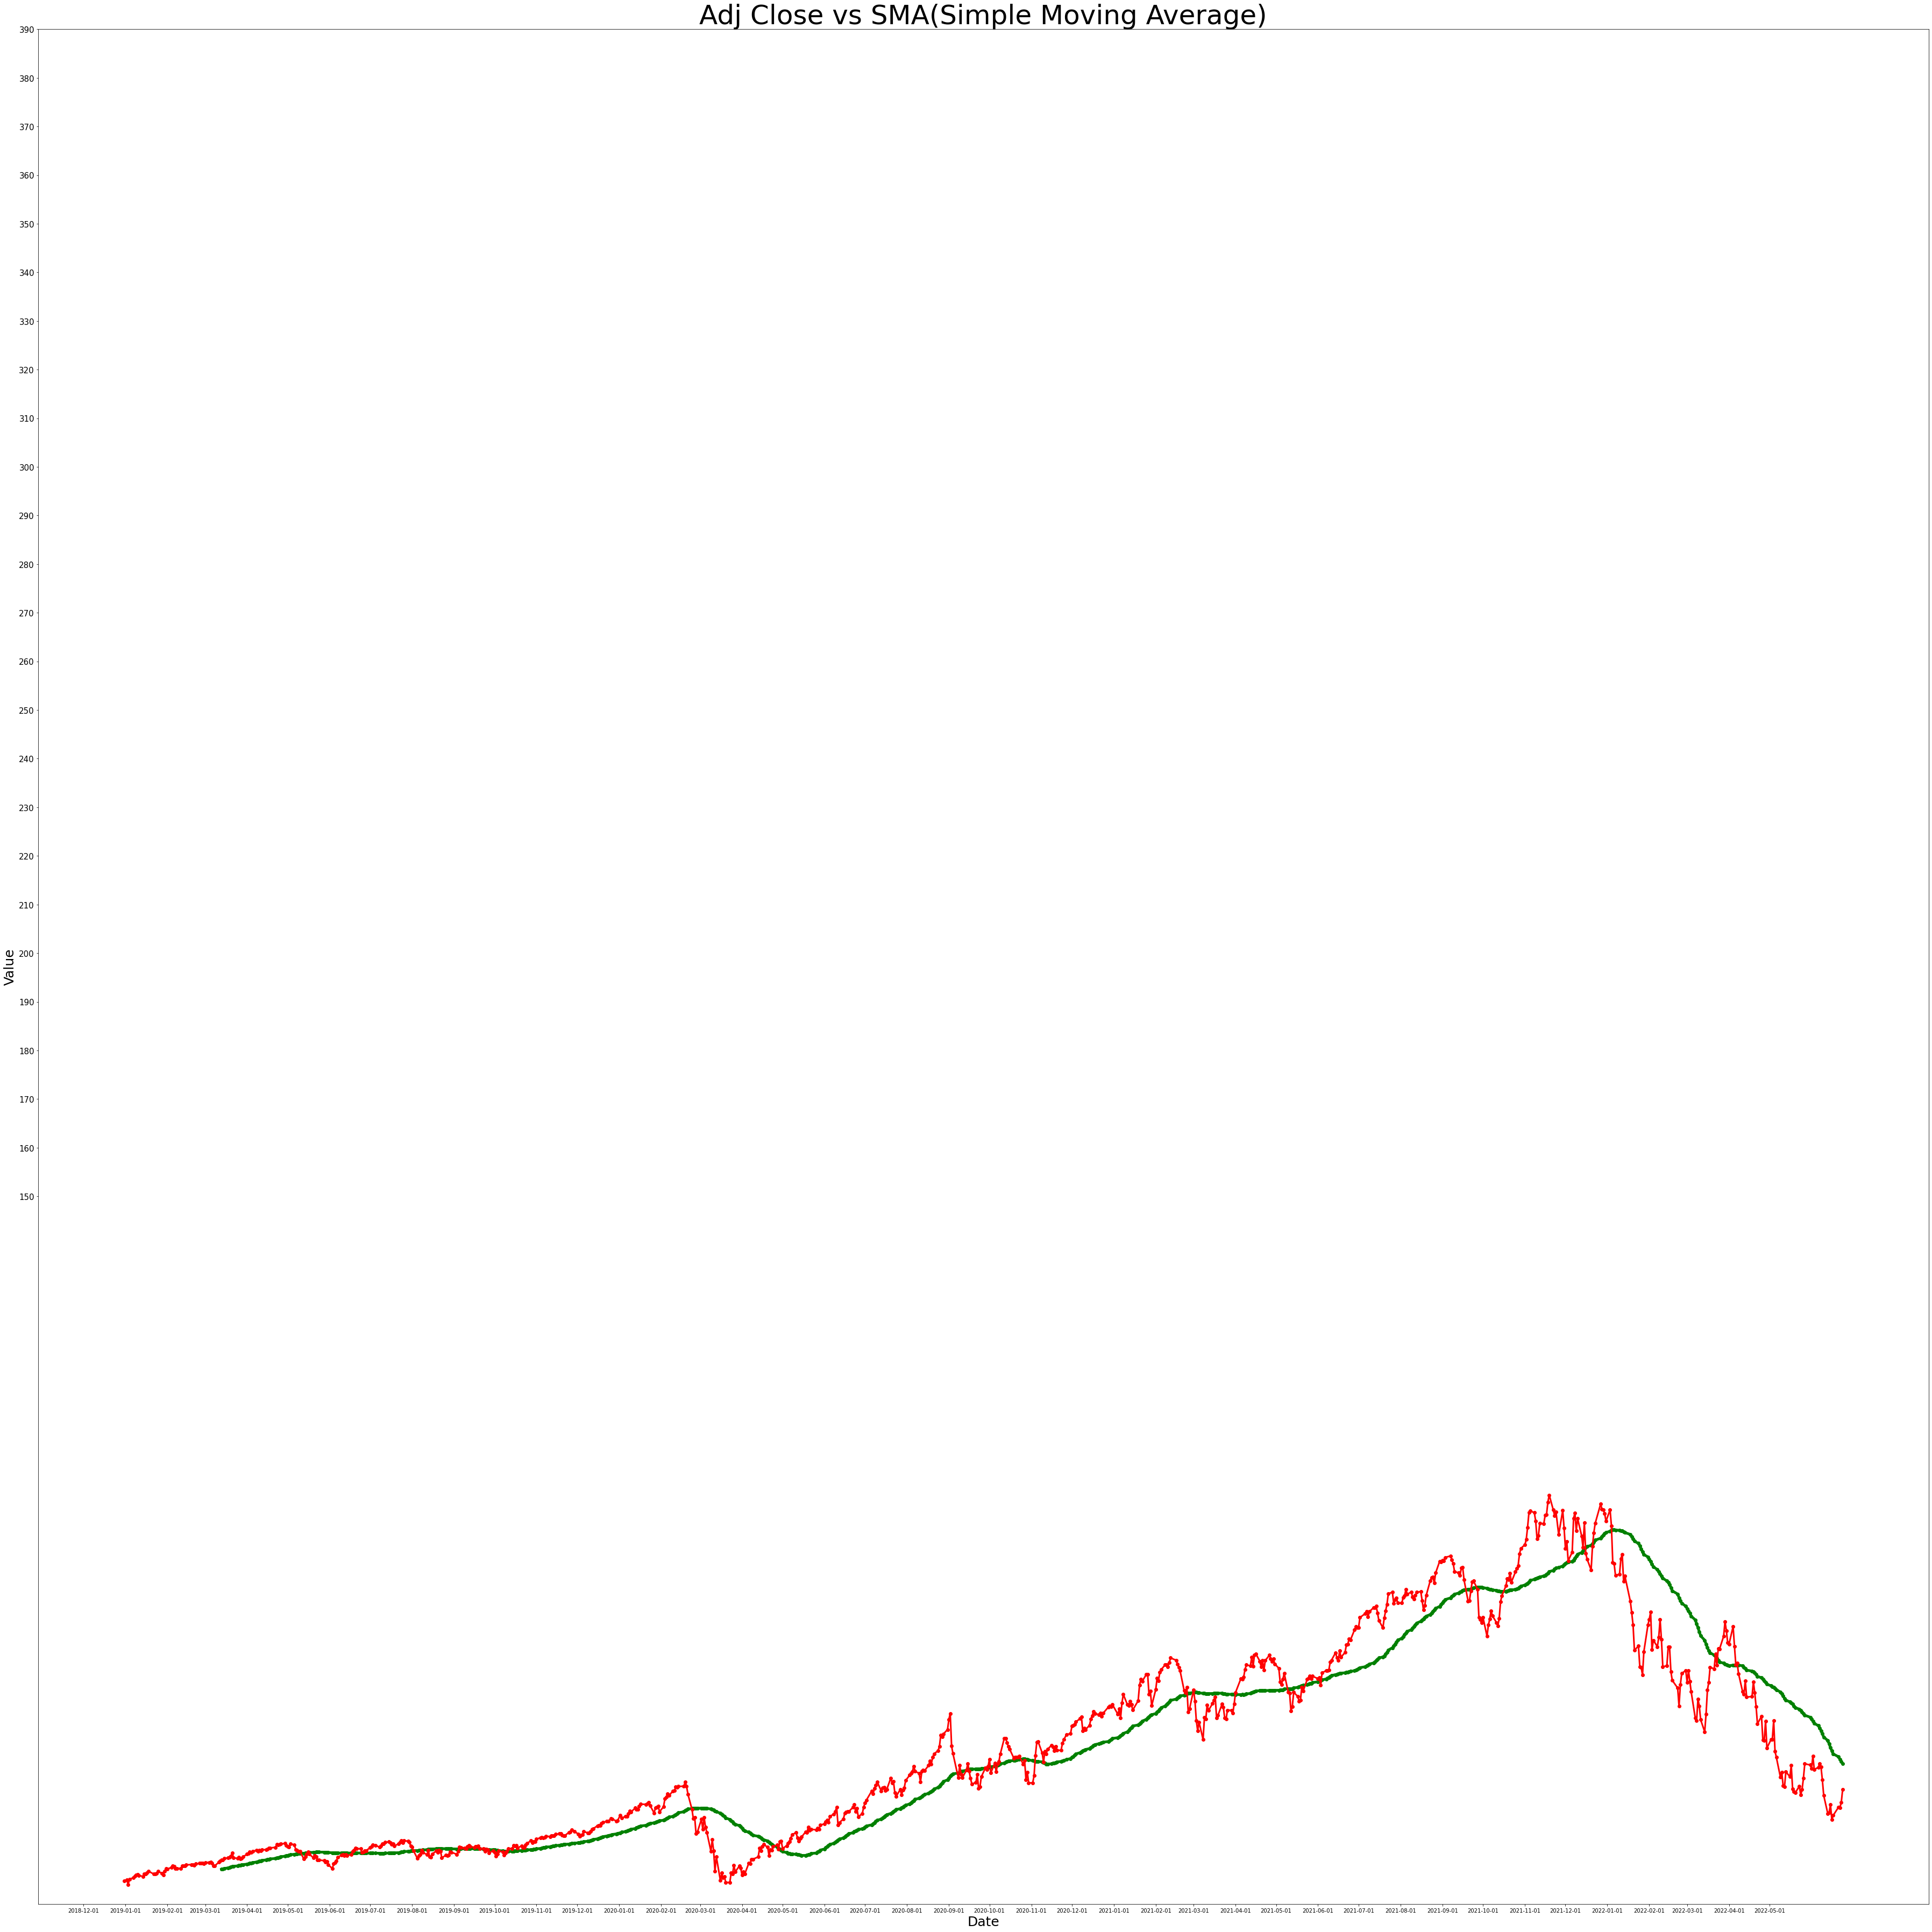

In [12]:
plt.figure(figsize=(50, 50))
plt.plot_date(df.index, df[smaString], linestyle='solid', lw=5, color='g')
plt.plot_date(df.index, df['Adj Close'], linestyle='solid', lw=3, color='r')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Value', fontsize=25)
plt.xticks(np.arange(min(df.index), max(df.index), np.timedelta64(1, 'M'), dtype='datetime64[M]'), fontsize=10)
plt.yticks(np.arange(150, 400, 10), fontsize=15)
plt.title('Adj Close vs SMA(Simple Moving Average)', fontsize=50)
plt.tight_layout()

#### <font color=pink> Calculating EMA and introducing the new columns for the same 
<font color=pink> Different time periods are used for the point of backtesting in the next part

In [13]:
EMAsUsed = [3, 5, 8, 12, 15, 30, 35, 40, 45, 60]
for x in EMAsUsed:
    df['EMA'+str(x)] = round(df['Adj Close'].ewm(span=x, adjust=False).mean(), 2)
df

,Open,High,Low,Close,Adj Close,Volume,Sma50,EMA3,EMA5,EMA8,EMA12,EMA15,EMA30,EMA35,EMA40,EMA45,EMA60
Date,,,,,,,,,,,,,,,,,
2018-12-31,9.340000,9.420000,9.012500,9.260000,9.253369,108483200,NaN,9.25,9.25,9.25,9.25,9.25,9.25,9.25,9.25,9.25,9.25
2019-01-02,8.695000,9.557500,8.682500,9.392500,9.385775,135832800,NaN,9.32,9.30,9.28,9.27,9.27,9.26,9.26,9.26,9.26,9.26
2019-01-03,8.995000,9.102500,8.407500,8.482500,8.476426,165255200,NaN,8.90,9.02,9.10,9.15,9.17,9.21,9.22,9.22,9.23,9.23
2019-01-04,8.887500,9.690000,8.792500,9.567500,9.560649,136482000,NaN,9.23,9.20,9.21,9.21,9.22,9.23,9.24,9.24,9.24,9.24
2019-01-07,9.617500,10.037500,9.532500,9.872500,9.865431,106553200,NaN,9.55,9.42,9.35,9.31,9.30,9.27,9.27,9.27,9.27,9.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-17,22.070000,23.280001,21.650000,22.670000,22.670000,220134700,35.3228,23.00,23.89,25.22,26.54,27.31,30.66,31.75,32.83,33.88,36.89
2022-06-21,23.820000,24.980000,23.780001,24.379999,24.379999,159204100,34.7294,23.69,24.05,25.04,26.21,26.94,30.26,31.34,32.42,33.47,36.48
2022-06-22,23.709999,25.450001,23.549999,24.290001,24.290001,194486800,34.1784,23.99,24.13,24.87,25.91,26.61,29.87,30.95,32.02,33.07,36.08


## <font color=pink> BackTesting the Red White Blue pattern trading

In [14]:
pos=0 #not in position
num=0 #row count
percentagechange = []

for i in df.index:
    cmin = min(df['EMA3'][i], df['EMA5'][i], df['EMA8'][i], df['EMA12'][i], df['EMA15'][i])
    cmax = max(df['EMA30'][i], df['EMA35'][i], df['EMA40'][i], df['EMA45'][i], df['EMA60'][i])

    close = df['Adj Close'][i]

    if(cmin>cmax):
        #Red White Blue
        if(pos==0):
            bp=close
            pos=1
            print("Buying now at "+str(bp))
    elif(cmin<cmax):
        #Blue White Red
        if(pos==1):
            sp=close
            pos=0
            print("Selling now at "+str(sp))
            pc = (sp/bp -1)*100
            percentagechange.append(pc)
    if(num==df['Adj Close'].count()-1 and pos==1):
        sp=close
        pos=0
        print("Selling now at "+str(sp))
        pc = (sp/bp -1)*100
        percentagechange.append(pc)
    num+=1
print(percentagechange)


Buying now at 9.385774612426758
Selling now at 8.476426124572754
Buying now at 9.86543083190918
Selling now at 15.236989974975586
Buying now at 15.479401588439941
Selling now at 15.424422264099121
Buying now at 16.286609649658203
Selling now at 15.236989974975586
Buying now at 16.351587295532227
Selling now at 21.985000610351562
Buying now at 19.162500381469727
Selling now at 30.405000686645508
Buying now at 35.275001525878906
Selling now at 33.23749923706055
Buying now at 37.849998474121094
Selling now at 47.91999816894531
Buying now at 50.709999084472656
Selling now at 49.57500076293945
Buying now at 51.060001373291016
Selling now at 66.74500274658203
Buying now at 72.4749984741211
Selling now at 79.01000213623047
Buying now at 83.72000122070312
Selling now at 77.75
Buying now at 82.8949966430664
Selling now at 76.56999969482422
Buying now at 86.69499969482422
Selling now at 74.67500305175781
[-9.688582193845008, 54.44829764243444, -0.3551773240502931, -6.444678771463308, 34.45178264

### <font color=pink> Summary Statistics for the above Strategy

In [16]:
gains=0
losses=0
ng=0
nl=0
totalR=1

for i in percentagechange:
	if(i>0):
		gains+=i
		ng+=1
	else:
		losses+=i
		nl+=1
	totalR=totalR*((i/100)+1)

totalR=round((totalR-1)*100,2)

if(ng>0):
	avgGain=gains/ng
	maxR=str(max(percentagechange))
else:
	avgGain=0
	maxR="undefined"

if(nl>0):
	avgLoss=losses/nl
	maxL=str(min(percentagechange))
	ratio=str(-avgGain/avgLoss)
else:
	avgLoss=0
	maxL="undefined"
	ratio="inf"

if(ng>0 or nl>0):
	battingAvg=ng/(ng+nl)
else:
	battingAvg=0

print()
print("Results for "+ stock +" going back to "+str(df.index[0])+", Sample size: "+str(ng+nl)+" trades")
print("EMAs used: "+str(EMAsUsed))
print("Batting Avg: "+ str(battingAvg))
print("Gain/loss ratio: "+ ratio)
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxR)
print("Max Loss: "+ maxL)
print("Total return over "+str(ng+nl)+ " trades: "+ str(totalR)+"%" )


Results for TQQQ going back to 2018-12-31 00:00:00, Sample size: 14 trades
EMAs used: [3, 5, 8, 12, 15, 30, 35, 40, 45, 60]
Batting Avg: 0.42857142857142855
Gain/loss ratio: 5.368374839115697
Average Gain: 35.65167474238868
Average Loss: -6.641055405188767
Max Return: 58.669276354182664
Max Loss: -13.864694256160215
Total return over 14 trades: 240.65%
